<a href="https://colab.research.google.com/github/Cole-Pd/DeepDive/blob/main/Project_4_Draft_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title

## Problem Definition


State the business problem. Translate the business problem into a Data Science problem by stating what kind of problem it is ( supervised vs unsupervised ) and whether it is a classification, regression, or clustering problem.

## Data Collection/Sources


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns

In [147]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.4-Spotify/Data/Spotify.csv"
#!curl -s -I {url}

In [148]:
df = pd.read_csv(url)
df

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,Weeks Charted,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,100,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,99,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,2021-07-23--2021-07-30\n2021-07-16--2021-07-23...,98,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,2021-07-23--2021-07-30,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,"4,630,675",Dua Lipa,27167675,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,2019-12-27--2020-01-03,79,0.762,0.7,-6.021,0.0694,0.00261,0.153,116.073,209320,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,"4,623,030",Jorge & Mateus,15019109,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,2019-12-27--2020-01-03,66,0.528,0.87,-3.123,0.0851,0.24,0.333,152.37,181930,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),"4,620,876",Camila Cabello,22698747,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,2019-12-27--2020-01-03,81,0.765,0.523,-4.333,0.03,0.184,0.132,104.988,217307,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,"4,607,385","Dadá Boladão, Tati Zaqui, OIK",208630,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,2019-12-27--2020-01-03,60,0.832,0.55,-7.026,0.0587,0.249,0.182,154.064,152784,0.881,F


## Data Cleaning


## Meta Data

In [149]:
pd.options.display.max_columns = 50
df = df.drop(['Song ID','Index','Song Name'], axis = 1)
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555
Highest Charting Position,1,2,1,3,5,1,3,2,3,8,4,9,5,1,2,7,3,5,14,20,19,22,1,24,1,...,153,107,36,39,38,125,169,176,150,187,145,192,59,72,128,143,156,178,187,190,195,196,197,198,199
Number of Times Charted,8,3,11,5,1,18,16,10,8,10,43,9,3,19,10,10,17,14,5,7,3,5,29,31,83,...,3,2,2,2,2,2,2,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1
Week of Highest Charting,2021-07-23--2021-07-30,2021-07-23--2021-07-30,2021-06-25--2021-07-02,2021-07-02--2021-07-09,2021-07-23--2021-07-30,2021-05-07--2021-05-14,2021-05-14--2021-05-21,2021-06-18--2021-06-25,2021-06-18--2021-06-25,2021-07-02--2021-07-09,2021-05-07--2021-05-14,2021-07-02--2021-07-09,2021-07-09--2021-07-16,2021-04-02--2021-04-09,2021-05-21--2021-05-28,2021-05-21--2021-05-28,2021-05-21--2021-05-28,2021-04-23--2021-04-30,2021-07-02--2021-07-09,2021-07-23--2021-07-30,2021-07-16--2021-07-23,2021-07-23--2021-07-30,2021-03-12--2021-03-19,2021-07-23--2021-07-30,2020-06-12--2020-06-19,...,2019-12-27--2020-01-03,2020-01-03--2020-01-10,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2020-01-03--2020-01-10,2020-01-03--2020-01-10,2019-12-27--2020-01-03,2020-01-03--2020-01-10,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454","30,071,134","29,356,736","26,951,613","25,030,128","24,551,591","23,518,010","22,405,111","22,062,812","20,294,457","19,985,713","19,480,679","18,571,755","18,053,141","17,617,965","16,908,917","16,606,925","16,126,897","15,684,978","15,089,184","15,011,809",...,"4,816,702","6,145,132","5,898,484","5,748,010","5,586,351","5,229,616","4,935,492","4,856,458","4,732,292","4,679,948","4,594,157","4,543,012","8,896,030","7,685,470","5,632,102","5,363,493","5,149,797","4,852,004","4,701,532","4,676,857","4,630,675","4,623,030","4,620,876","4,607,385","4,595,450"
Artist,Måneskin,The Kid LAROI,Olivia Rodrigo,Ed Sheeran,Lil Nas X,Lil Nas X,Doja Cat,Rauw Alejandro,Bad Bunny,Måneskin,Dua Lipa,"J Balvin, Maria Becerra",BTS,Justin Bieber,BTS,Olivia Rodrigo,Olivia Rodrigo,The Weeknd,"Nio Garcia, J Balvin, Bad Bunny",Doja Cat,"Mora, Bad Bunny, Sech",Doja Cat,Olivia Rodrigo,Glass Animals,The Weeknd,...,DJ Snake,"The Chainsmokers, Kygo","JACKBOYS, Sheck Wes",Don Toliver,"JACKBOYS, Travis Scott",French Montana,24kGoldn,Lauv,Apache 207,Katy Perry,Calvin Harris,Ozuna,"SHAED, ZAYN","JACKBOYS, Pop Smoke, Travis Scott",Doja Cat,JACKBOYS,"Anitta, Lexa, Luísa Sonza",Lil Nas X,Juice WRLD,"Gradur, Heuss L'enfoiré",Dua Lipa,Jorge & Mateus,Camila Cabello,"Dadá Boladão, Tati Zaqui, OIK",Taylor Swift
Artist Followers,3377762,2230022,6266514,83293380,5473565,5473565,8640063,6080597,36142273,3377762,27142474,29051363,37106176,48504126,37106176,6266514,6266514,35305637,2123734,8640063,151486,8640063,6266514,1890510,35305637,...,7408249,18195884,437907,437907,437907,4039037,1276406,,1674348,18936929,21946934,29238936,139434,437907,8671649,437907,10741972,5488666,19102888,1390813,27167675,15019109,22698747,208630,42227614
Genre,"['indie rock italiano', 'italian pop']",['australian hip hop'],['pop'],"['pop', 'uk pop']","['lgbtq+ hip hop', 'pop rap']","['lgbtq+ hip hop', 'pop rap']","['dance pop', 'pop']","['puerto rican pop', 'trap latino']","['latin', 'reggaeton', 'trap latino']","['indie rock italiano', 'italian pop']","['dance pop', 'pop', 'uk pop']","['latin', 'reggaeton', 'reggaeton colombiano']","['k-pop', 'k-pop boy group']","['canadian pop', 'pop', 'post-teen pop']","['k-pop', 'k-pop boy group']",['pop'],['pop'],"['cana

In [150]:
df.info() # Some of our numeric columns are objects.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Highest Charting Position  1556 non-null   int64 
 1   Number of Times Charted    1556 non-null   int64 
 2   Week of Highest Charting   1556 non-null   object
 3   Streams                    1556 non-null   object
 4   Artist                     1556 non-null   object
 5   Artist Followers           1556 non-null   object
 6   Genre                      1556 non-null   object
 7   Release Date               1556 non-null   object
 8   Weeks Charted              1556 non-null   object
 9   Popularity                 1556 non-null   object
 10  Danceability               1556 non-null   object
 11  Energy                     1556 non-null   object
 12  Loudness                   1556 non-null   object
 13  Speechiness                1556 non-null   object
 14  Acoustic

In [151]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555
Highest Charting Position,1,2,1,3,5,1,3,2,3,8,4,9,5,1,2,7,3,5,14,20,19,22,1,24,1,...,153,107,36,39,38,125,169,176,150,187,145,192,59,72,128,143,156,178,187,190,195,196,197,198,199
Number of Times Charted,8,3,11,5,1,18,16,10,8,10,43,9,3,19,10,10,17,14,5,7,3,5,29,31,83,...,3,2,2,2,2,2,2,1,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1
Week of Highest Charting,2021-07-23--2021-07-30,2021-07-23--2021-07-30,2021-06-25--2021-07-02,2021-07-02--2021-07-09,2021-07-23--2021-07-30,2021-05-07--2021-05-14,2021-05-14--2021-05-21,2021-06-18--2021-06-25,2021-06-18--2021-06-25,2021-07-02--2021-07-09,2021-05-07--2021-05-14,2021-07-02--2021-07-09,2021-07-09--2021-07-16,2021-04-02--2021-04-09,2021-05-21--2021-05-28,2021-05-21--2021-05-28,2021-05-21--2021-05-28,2021-04-23--2021-04-30,2021-07-02--2021-07-09,2021-07-23--2021-07-30,2021-07-16--2021-07-23,2021-07-23--2021-07-30,2021-03-12--2021-03-19,2021-07-23--2021-07-30,2020-06-12--2020-06-19,...,2019-12-27--2020-01-03,2020-01-03--2020-01-10,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2020-01-03--2020-01-10,2020-01-03--2020-01-10,2019-12-27--2020-01-03,2020-01-03--2020-01-10,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03,2019-12-27--2020-01-03
Streams,"48,633,449","47,248,719","40,162,559","37,799,456","33,948,454","30,071,134","29,356,736","26,951,613","25,030,128","24,551,591","23,518,010","22,405,111","22,062,812","20,294,457","19,985,713","19,480,679","18,571,755","18,053,141","17,617,965","16,908,917","16,606,925","16,126,897","15,684,978","15,089,184","15,011,809",...,"4,816,702","6,145,132","5,898,484","5,748,010","5,586,351","5,229,616","4,935,492","4,856,458","4,732,292","4,679,948","4,594,157","4,543,012","8,896,030","7,685,470","5,632,102","5,363,493","5,149,797","4,852,004","4,701,532","4,676,857","4,630,675","4,623,030","4,620,876","4,607,385","4,595,450"
Artist,Måneskin,The Kid LAROI,Olivia Rodrigo,Ed Sheeran,Lil Nas X,Lil Nas X,Doja Cat,Rauw Alejandro,Bad Bunny,Måneskin,Dua Lipa,"J Balvin, Maria Becerra",BTS,Justin Bieber,BTS,Olivia Rodrigo,Olivia Rodrigo,The Weeknd,"Nio Garcia, J Balvin, Bad Bunny",Doja Cat,"Mora, Bad Bunny, Sech",Doja Cat,Olivia Rodrigo,Glass Animals,The Weeknd,...,DJ Snake,"The Chainsmokers, Kygo","JACKBOYS, Sheck Wes",Don Toliver,"JACKBOYS, Travis Scott",French Montana,24kGoldn,Lauv,Apache 207,Katy Perry,Calvin Harris,Ozuna,"SHAED, ZAYN","JACKBOYS, Pop Smoke, Travis Scott",Doja Cat,JACKBOYS,"Anitta, Lexa, Luísa Sonza",Lil Nas X,Juice WRLD,"Gradur, Heuss L'enfoiré",Dua Lipa,Jorge & Mateus,Camila Cabello,"Dadá Boladão, Tati Zaqui, OIK",Taylor Swift
Artist Followers,3377762,2230022,6266514,83293380,5473565,5473565,8640063,6080597,36142273,3377762,27142474,29051363,37106176,48504126,37106176,6266514,6266514,35305637,2123734,8640063,151486,8640063,6266514,1890510,35305637,...,7408249,18195884,437907,437907,437907,4039037,1276406,,1674348,18936929,21946934,29238936,139434,437907,8671649,437907,10741972,5488666,19102888,1390813,27167675,15019109,22698747,208630,42227614
Genre,"['indie rock italiano', 'italian pop']",['australian hip hop'],['pop'],"['pop', 'uk pop']","['lgbtq+ hip hop', 'pop rap']","['lgbtq+ hip hop', 'pop rap']","['dance pop', 'pop']","['puerto rican pop', 'trap latino']","['latin', 'reggaeton', 'trap latino']","['indie rock italiano', 'italian pop']","['dance pop', 'pop', 'uk pop']","['latin', 'reggaeton', 'reggaeton colombiano']","['k-pop', 'k-pop boy group']","['canadian pop', 'pop', 'post-teen pop']","['k-pop', 'k-pop boy group']",['pop'],['pop'],"['cana

In [152]:
df['Streams'] = df['Streams'].apply(lambda x: x.replace(",",""))

In [153]:
as_type_float = [
                 'Streams',
                 'Artist Followers',
                 'Popularity',
                 'Danceability',
                 'Energy',
                 'Loudness',
                 'Speechiness',
                 'Acousticness',
                 'Liveness',
                 'Tempo',
                 'Duration (ms)',
                 'Valence'
                 ]

In [154]:
these_ones_dont_work = []

for element in as_type_float:
  try:
    df[element] = df[element].astype('float')
  except:
    these_ones_dont_work.append(element)

these_ones_dont_work

['Artist Followers',
 'Popularity',
 'Danceability',
 'Energy',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Liveness',
 'Tempo',
 'Duration (ms)',
 'Valence']

In [155]:
for element in these_ones_dont_work:
  print(df[df[element] == ' '].index)

Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')
Int64Index([35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], dtype='int64')


In [156]:
df = df.drop(index =[35, 163, 464, 530, 636, 654, 750, 784, 876, 1140, 1538], axis = 0 )

In [157]:
for element in these_ones_dont_work:
  print(df[df[element] == ' '].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [158]:
these_ones_still_dont_work = []


for element in as_type_float:
  try:
    df[element] = df[element].astype('float')
  except:
    these_ones_still_dont_work.append(element)

these_ones_still_dont_work

[]

<Axes: xlabel='Weeks Charted', ylabel='Count'>

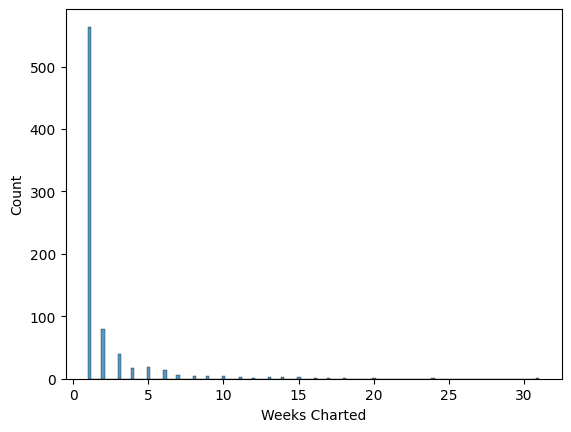

In [159]:
filter = df['Weeks Charted'] == '2021-07-23--2021-07-30\n2021-07-16--2021-07-23\n2021-07-09--2021-07-16\n2021-07-02--2021-07-09\n2021-06-25--2021-07-02\n2021-06-18--2021-06-25\n2021-06-11--2021-06-18\n2021-06-04--2021-06-11\n2021-05-28--2021-06-04\n2021-05-21--2021-05-28\n2021-05-14--2021-05-21\n2021-05-07--2021-05-14\n2021-04-30--2021-05-07\n2021-04-23--2021-04-30\n2021-04-16--2021-04-23\n2021-04-09--2021-04-16\n2021-04-02--2021-04-09\n2021-03-26--2021-04-02\n2021-03-19--2021-03-26\n2021-03-12--2021-03-19\n2021-03-05--2021-03-12\n2021-02-26--2021-03-05\n2021-02-19--2021-02-26\n2021-02-12--2021-02-19\n2021-02-05--2021-02-12\n2021-01-29--2021-02-05\n2021-01-22--2021-01-29\n2021-01-15--2021-01-22\n2021-01-08--2021-01-15\n2021-01-01--2021-01-08\n2020-12-25--2021-01-01\n2020-12-18--2020-12-25\n2020-12-11--2020-12-18\n2020-12-04--2020-12-11\n2020-11-27--2020-12-04\n2020-11-20--2020-11-27\n2020-11-13--2020-11-20\n2020-11-06--2020-11-13\n2020-10-30--2020-11-06\n2020-10-23--2020-10-30\n2020-10-16--2020-10-23\n2020-10-09--2020-10-16\n2020-10-02--2020-10-09\n2020-09-25--2020-10-02\n2020-09-18--2020-09-25\n2020-09-11--2020-09-18\n2020-09-04--2020-09-11\n2020-08-28--2020-09-04\n2020-08-21--2020-08-28\n2020-08-14--2020-08-21\n2020-08-07--2020-08-14\n2020-07-31--2020-08-07\n2020-07-24--2020-07-31\n2020-07-17--2020-07-24\n2020-07-10--2020-07-17\n2020-07-03--2020-07-10\n2020-06-26--2020-07-03\n2020-06-19--2020-06-26\n2020-06-12--2020-06-19\n2020-06-05--2020-06-12\n2020-05-29--2020-06-05\n2020-05-22--2020-05-29\n2020-05-15--2020-05-22\n2020-05-08--2020-05-15\n2020-05-01--2020-05-08\n2020-04-24--2020-05-01\n2020-04-17--2020-04-24\n2020-04-10--2020-04-17\n2020-04-03--2020-04-10\n2020-03-27--2020-04-03\n2020-03-20--2020-03-27\n2020-03-13--2020-03-20\n2020-03-06--2020-03-13\n2020-02-28--2020-03-06\n2020-02-21--2020-02-28\n2020-02-14--2020-02-21\n2020-02-07--2020-02-14\n2020-01-31--2020-02-07\n2020-01-24--2020-01-31\n2020-01-17--2020-01-24\n2020-01-10--2020-01-17\n2020-01-03--2020-01-10\n2019-12-27--2020-01-03'
len(list(df[filter]['Weeks Charted'].iloc[0].split()))
df.shape[0]

sns.histplot(df['Weeks Charted'].value_counts())

In [160]:
df['Weeks Charted'].value_counts()

2020-12-18--2020-12-25                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

The week's charted is stored as a 'string' from my analysis it looks like it is intended to be a list of strings. The object is a type string with denoted by the difference of two weeks. Using a set will allow us to represent one week at the top of the chart as one week.

In [161]:
'2020-12-18--2020-12-25'
'2019-12-27--2020-01-03/n'


'2019-12-27--2020-01-03/n'

In [162]:
df[filter]['Weeks Charted'].iloc[0]

'2021-07-23--2021-07-30\n2021-07-16--2021-07-23\n2021-07-09--2021-07-16\n2021-07-02--2021-07-09\n2021-06-25--2021-07-02\n2021-06-18--2021-06-25\n2021-06-11--2021-06-18\n2021-06-04--2021-06-11\n2021-05-28--2021-06-04\n2021-05-21--2021-05-28\n2021-05-14--2021-05-21\n2021-05-07--2021-05-14\n2021-04-30--2021-05-07\n2021-04-23--2021-04-30\n2021-04-16--2021-04-23\n2021-04-09--2021-04-16\n2021-04-02--2021-04-09\n2021-03-26--2021-04-02\n2021-03-19--2021-03-26\n2021-03-12--2021-03-19\n2021-03-05--2021-03-12\n2021-02-26--2021-03-05\n2021-02-19--2021-02-26\n2021-02-12--2021-02-19\n2021-02-05--2021-02-12\n2021-01-29--2021-02-05\n2021-01-22--2021-01-29\n2021-01-15--2021-01-22\n2021-01-08--2021-01-15\n2021-01-01--2021-01-08\n2020-12-25--2021-01-01\n2020-12-18--2020-12-25\n2020-12-11--2020-12-18\n2020-12-04--2020-12-11\n2020-11-27--2020-12-04\n2020-11-20--2020-11-27\n2020-11-13--2020-11-20\n2020-11-06--2020-11-13\n2020-10-30--2020-11-06\n2020-10-23--2020-10-30\n2020-10-16--2020-10-23\n2020-10-09--202

## Exploratory Data Analysis


In [163]:
from datetime import datetime, timedelta


def parse_weeks(weeks_str):
    weeks_list = weeks_str.split('\n')
    parsed_weeks = []
    for week in weeks_list:
        start_date, end_date = week.split('--')
        start_date = datetime.strptime(start_date, '%Y-%m-%d')
        end_date = datetime.strptime(end_date, '%Y-%m-%d')
        parsed_weeks.append((start_date, end_date))
    return parsed_weeks

# Example usage:
# Create a new row 'Parsed Weeks' in your dataframe 'df'
df['Parsed Weeks'] = df['Weeks Charted'].apply(parse_weeks)

In [164]:
df['Parsed Weeks']

0       [(2021-07-23 00:00:00, 2021-07-30 00:00:00), (...
1       [(2021-07-23 00:00:00, 2021-07-30 00:00:00), (...
2       [(2021-07-23 00:00:00, 2021-07-30 00:00:00), (...
3       [(2021-07-23 00:00:00, 2021-07-30 00:00:00), (...
4            [(2021-07-23 00:00:00, 2021-07-30 00:00:00)]
                              ...                        
1551         [(2019-12-27 00:00:00, 2020-01-03 00:00:00)]
1552         [(2019-12-27 00:00:00, 2020-01-03 00:00:00)]
1553         [(2019-12-27 00:00:00, 2020-01-03 00:00:00)]
1554         [(2019-12-27 00:00:00, 2020-01-03 00:00:00)]
1555         [(2019-12-27 00:00:00, 2020-01-03 00:00:00)]
Name: Parsed Weeks, Length: 1545, dtype: object

## Processing


In [198]:
def count_days_between_tuples(weeks_list):
    start_week = df['Parsed Weeks'][0][0][0]
    end_week = df['Parsed Weeks'][0][0][1]

    days_between = []
    for i in range(len(weeks_list) - 1):
        start_week = df['Parsed Weeks'][0][0][0]
        end_week = df['Parsed Weeks'][0][0][1]
        #start_date = weeks_list[i][1]  # End date of previous week
        #end_date = weeks_list[i+1][0]  # Start date of next week
        days_between.append((start_date - end_date).days)
    return days_between

# Example usage:
# Create a new row 'Days Between' in your dataframe 'df'
df['Days Between'] = df['Parsed Weeks'].apply(count_days_between_tuples)

NameError: name 'start_date' is not defined

In [197]:
df[['Days Between','Parsed Weeks']]

,Days Between,Parsed Weeks
0,"[14, 14, 14, 14, 14, 14, 14]","[(2021-07-23 00:00:00, 2021-07-30 00:00:00), (..."
1,"[14, 14]","[(2021-07-23 00:00:00, 2021-07-30 00:00:00), (..."
2,"[14, 14, 14, 14, 14, 14, 14, 14, 14, 14]","[(2021-07-23 00:00:00, 2021-07-30 00:00:00), (..."
3,"[14, 14, 14, 14]","[(2021-07-23 00:00:00, 2021-07-30 00:00:00), (..."
4,[],"[(2021-07-23 00:00:00, 2021-07-30 00:00:00)]"
...,...,...
1551,[],"[(2019-12-27 00:00:00, 2020-01-03 00:00:00)]"
1552,[],"[(2019-12-27 00:00:00, 2020-01-03 00:00:00)]"
1553,[],"[(2019-12-27 00:00:00, 2020-01-03 00:00:00)]"
1554,[],"[(2019-12-27 00:00:00, 2020-01-03 00:00:00)]"


In [190]:
filter = len(set(df['Days Between'][0]))

In [166]:
start_week = df['Parsed Weeks'][0][0][0]
end_week = df['Parsed Weeks'][0][0][1]

In [167]:
print((end_week - start_week).days)

7


## Data Visualization/Communication of Results
